# Introduction to Exploratory Data Analysis

Exploratory Data Analysis is a process to perform initial investigations on a data set so as to discover patterns, spot anomalies or validate assumptions.

In this process, an analyst relies on summary statistics and visualizations. 

Important skills for conducting EDA with python include knowledge of python scripting, pandas and visualizations using matplotlib and/or seaborn

In [1]:
#import the libaries to work with
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Set
The data set for this exercise is obtained online from the UCI machine learning repository. Click [here](https://archive-beta.ics.uci.edu/ml/datasets/online+retail) to visit the download page.

It is described as a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [2]:
#load the data set

#data = pd.read_excel('OnlineRetail.xlsx', index_col=0, sheet_name='Online Retail')

#for the purpose of this class I saved the data as csv so that loading time is faster
data = pd.read_csv('OnlineRetail.csv')
#I loaded index_col=0 so that the InvoiceNo can be used as index column
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Understand the data
An introductory step is to look at the content of the data to get an idea of what you're going to be dealing with

In [3]:
#view the shape of the data
#DataFrame.shape tells you the number of rows and columns contained in the dataframe
data.shape

(541909, 8)

In [4]:
#check the head of the data
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [5]:
#check the tail of the data
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
#view info relating to the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
#there's another way to view data types
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
#if the data set had a large number of columns, you can view the column names by accessing the columns attribute
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
#view summary statistics
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Cleaning and Manipulation

You may choose to delete rows or columns, modify content such as filling in empty values, etc

In [10]:
#check for missing data
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
#what do the records with empty customer ID mean? Does it mean the sale was not recorded to a customer? 
data[data.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [12]:
#what about records with empty descriptions?
data[data.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [15]:
#how many unique stock codes have no description?
len(data[data.Description.isna()].StockCode.unique())

960

In [16]:
#how many countries have sales with no description?
data[data.Description.isna()].Country.value_counts()

United Kingdom    1454
Name: Country, dtype: int64

It appears sales in the United Kingdom tend to have no description

In [17]:
#how many countries have sales with no customer ID?
data[data.CustomerID.isna()].Country.value_counts()

United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

In [18]:
#assuming you don't want to keep records that have no description, you can choose to delete those rows 


print('Total number of records: ',data.shape[0])
print('Number of records with missing description: ',data[data.Description.isna()].shape[0])
print('Number of records without missing description: ',data[data.Description.notna()].shape[0])

Total number of records:  541909
Number of records with missing description:  1454
Number of records without missing description:  540455


In [19]:
#one easy way to do this is to use notna() to select records that are not NaN

data_clean_desc = data[data.Description.notna()]

In [20]:
#what are the rows with NaN values
data_clean_desc.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

What are other cleaning activities you can do?
* Replace values e.g. replace EIRE or RSA with a more easily recognizable name



In [22]:
data_clean_desc[data_clean_desc.Country=='EIRE'].Country.replace('EIRE','Ireland')

1404      Ireland
1405      Ireland
1406      Ireland
1407      Ireland
1408      Ireland
           ...   
539151    Ireland
539152    Ireland
539153    Ireland
539154    Ireland
539155    Ireland
Name: Country, Length: 8196, dtype: object

In [23]:
data_clean_desc['Country'] = data_clean_desc.Country.replace('EIRE','Ireland')

<ipython-input-23-12136a35ccca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_desc['Country'] = data_clean_desc.Country.replace('EIRE','Ireland')


In [25]:
data_clean_desc[data_clean_desc.Country=='Ireland'].head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,12/1/2010 14:05,9.95,14911.0,Ireland
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,12/1/2010 14:05,2.95,14911.0,Ireland


In [27]:
#let's replace NaN CustomerID with 'Unidentified'
#recall the data type of CustomerID here was originally float. We need to convert that to string
data_clean_desc['CustomerID'] = data_clean_desc.CustomerID.astype('Int64').astype('str')

<ipython-input-27-19d28f052713>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_desc['CustomerID'] = data_clean_desc.CustomerID.astype('Int64').astype('str')


In [28]:
data_clean_desc.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [29]:
data_clean_desc.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [30]:
# we found that NaN was now represented as <NA> after it was converted to string using the method above
data_clean_desc[data_clean_desc.CustomerID=='<NA>']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,<NA>,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,<NA>,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,<NA>,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,<NA>,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,<NA>,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,<NA>,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,<NA>,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,<NA>,United Kingdom


In [31]:
#replace every <NA> with 'Unidentified'
data_clean_desc.CustomerID.replace('<NA>','Unidentified',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [32]:
data_clean_desc[data_clean_desc.CustomerID=='<NA>']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [33]:
data_clean_desc[data_clean_desc.CustomerID=='Unidentified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,Unidentified,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,Unidentified,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,Unidentified,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,Unidentified,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,Unidentified,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,Unidentified,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,Unidentified,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,Unidentified,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,Unidentified,United Kingdom


In [34]:
data_clean_desc.CustomerID.value_counts()

Unidentified    133626
17841             7983
14911             5903
14096             5128
12748             4642
                 ...  
18141                1
13703                1
14705                1
15524                1
13256                1
Name: CustomerID, Length: 4373, dtype: int64

In [35]:
data_clean_desc.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Unidentified customers may be customers who visit the website for a purchase without creating an account.
This could be validated with the sales manager

If this is found to be tried, you could replace all 'Unidentified' with 'One Time', 'Walk In' or equivalent identifier.

## Relationships & Insights

Look at relationships in the data and try to answer basic business questions so as to gain more insights

In [40]:
#check correlations
data_clean_desc.corr()

,Quantity,UnitPrice,SaleValue
Quantity,1.000000,-0.001248,0.888164
UnitPrice,-0.001248,1.000000,-0.162036
SaleValue,0.888164,-0.162036,1.000000


In [36]:
#let's calculate average sale value
#create a column as unit price * quantity

data_clean_desc['SaleValue'] = data_clean_desc.UnitPrice * data_clean_desc.Quantity

<ipython-input-36-d90626c84271>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_desc['SaleValue'] = data_clean_desc.UnitPrice * data_clean_desc.Quantity


In [37]:
#what does sale value contain
data_clean_desc['SaleValue'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: SaleValue, dtype: float64

In [38]:
#average price per sale
data_clean_desc.groupby('InvoiceNo').SaleValue.mean()

InvoiceNo
536365         19.874286
536366         11.100000
536367         23.227500
536368         17.512500
536369         17.850000
               ...      
C581484   -168469.600000
C581490       -16.265000
C581499      -224.690000
C581568       -54.750000
C581569        -3.750000
Name: SaleValue, Length: 24446, dtype: float64

In [39]:
#average sale value overall
data_clean_desc.SaleValue.mean()

18.036187904641775

In [47]:
#total sales value by country
data_clean_desc.groupby('Country').SaleValue.sum().astype(int).sort_values(ascending=False)

Country
United Kingdom          8187806
Netherlands              284661
Ireland                  263276
Germany                  221698
France                   197403
Australia                137077
Switzerland               56385
Spain                     54774
Belgium                   40910
Sweden                    36595
Japan                     35340
Norway                    35163
Portugal                  29367
Finland                   22326
Channel Islands           20086
Denmark                   18768
Italy                     16890
Cyprus                    12946
Austria                   10154
Hong Kong                 10117
Singapore                  9120
Israel                     7907
Poland                     7213
Unspecified                4749
Greece                     4710
Iceland                    4309
Canada                     3666
Malta                      2505
United Arab Emirates       1902
USA                        1730
Lebanon                    1693


<AxesSubplot:>

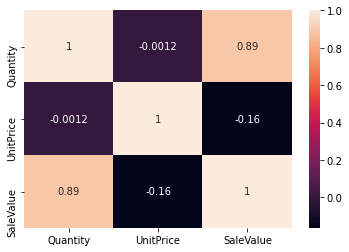

In [41]:
#you can visualize correlations using a heatmap
sns.heatmap(data_clean_desc.corr(),annot=True)

In [ ]:
sns.catplot(data=data_clean_desc,kind='box')

In [ ]:
#sns.pairplot(data=data_clean_desc)

In [43]:
#total sales quantities by country
data_clean_desc.groupby('Country').Quantity.sum().sort_values(ascending=False)

Country
United Kingdom          4277438
Netherlands              200128
Ireland                  142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


In [44]:
#average sales quantity by country
data_clean_desc.groupby('Country').Quantity.mean().sort_values(ascending=False)

Country
Netherlands             84.406580
Sweden                  77.136364
Japan                   70.441341
Australia               66.444003
Singapore               22.855895
Denmark                 21.048843
Czech Republic          19.733333
Lithuania               18.628571
Canada                  18.298013
Norway                  17.722836
Ireland                 17.403245
Hong Kong               16.559028
Finland                 15.346763
Switzerland             15.147353
Israel                  14.656566
United Arab Emirates    14.441176
Bahrain                 13.684211
Iceland                 13.505495
France                  12.911067
Channel Islands         12.505277
Germany                 12.369458
Austria                 12.037406
Belgium                 11.189947
Brazil                  11.125000
Poland                  10.712610
Greece                  10.657534
Portugal                10.651745
Spain                   10.589814
Cyprus                  10.155949
Italy 

In [49]:
#convert invoice date to datetime
data_clean_desc['InvoiceDate'] = pd.to_datetime(data_clean_desc.InvoiceDate)

<ipython-input-49-a69797c0fa26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_desc['InvoiceDate'] = pd.to_datetime(data_clean_desc.InvoiceDate)


In [48]:
data_clean_desc.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
SaleValue      float64
dtype: object

In [50]:
#sales quantity by dates
data_clean_desc.groupby('InvoiceDate').Quantity.sum()

InvoiceDate
2010-12-01 08:26:00     40
2010-12-01 08:28:00     12
2010-12-01 08:34:00     98
2010-12-01 08:35:00      3
2010-12-01 08:45:00    449
                      ... 
2011-12-09 12:23:00     76
2011-12-09 12:25:00    120
2011-12-09 12:31:00    278
2011-12-09 12:49:00     66
2011-12-09 12:50:00    105
Name: Quantity, Length: 22309, dtype: int64

In [51]:
# earliest and latest dates
print('Earliest date: ',data_clean_desc.InvoiceDate.min())
print('Latest date: ',data_clean_desc.InvoiceDate.max())

Earliest date:  2010-12-01 08:26:00
Latest date:  2011-12-09 12:50:00


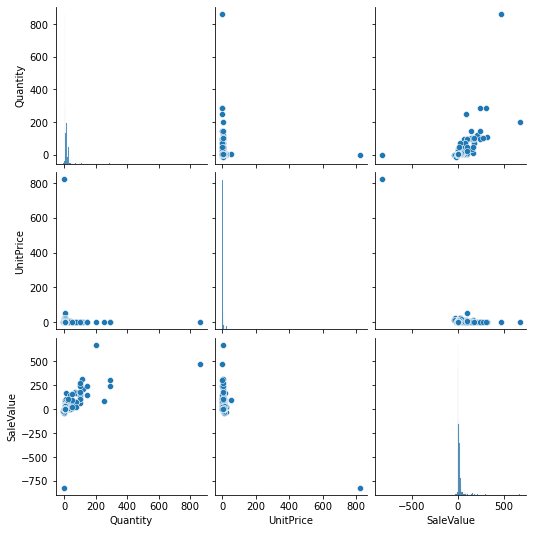

Wall time: 5.67 s


In [42]:
%%time
#view relationships between columns
#i'm doing pairplot on just a subset of the data because it runs for a while
sns.pairplot(data_clean_desc.sample(1000))
plt.show()

In [ ]:
#distplot
sns.displot(data = data_clean_desc.sample(1000))
plt.xlim(0,100) #limit x axis to the section of interest
plt.show()

### Bonus: Pandas Profiling

Pandas profiling is a package that allows you to create interactive column by column analysis. It can automate the process of basic EDA for you

In [52]:
#import pandas-profiling
from pandas_profiling import ProfileReport

In [53]:
#create profile report
ProfileReport(data_clean_desc)

In [54]:
#save profile report to interactive html page
ProfileReport(data_clean_desc).to_file('interactive_profile_report.html')

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)
